## Data loading and visualization

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read a dataframe located at csv file and 
# converte to pandas dataframe format

df = pd.read_csv('Preply_tutor_views_datasaet.csv')
df = pd.DataFrame(df)
df.head(5)

,id,user_id,tutor_id
0,1,00000055a78bf6735c4a89358fab1de34104c3cb,e78de9dad70d230a096f0bbdc3e89b5cae04ba77
1,2,00000055a78bf6735c4a89358fab1de34104c3cb,b9a521730141de9bc4fe8ebc9f33713411d0101a
2,3,00000055a78bf6735c4a89358fab1de34104c3cb,8378136c6dd0e03be859a210a0cee03955951fb1
3,4,00000055a78bf6735c4a89358fab1de34104c3cb,9cc68d8345f675892bcab0fad02f65b4ac7e71ea
4,5,00000055a78bf6735c4a89358fab1de34104c3cb,a8272c62cd05d5b882e4f630fb55cfa0ba8491e6


Text(0.5, 1.0, 'Number of tutors by received number of views')

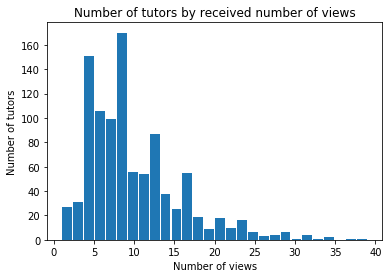

In [3]:
# Plot number of tutors by received number of views.
# In given dataset tutors commonly receive less than 20 views
# there are no extreme outliers.

dist = df['tutor_id'].value_counts().values

n, bins, patches = plt.hist(x=dist, bins='auto', rwidth=0.9)
plt.xlabel('Number of views')
plt.ylabel('Number of tutors')
plt.title('Number of tutors by received number of views')

Text(0.5, 1.0, 'Number of users by number of tuter they viewed')

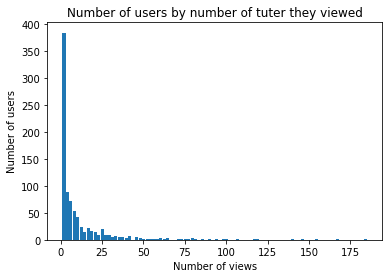

In [4]:
# Plot number of users by number of tutor they viewed.
# In given dataset users commonly watch several tutor
# but there are extreme outliers.

dist = df['user_id'].value_counts().values

n, bins, patches = plt.hist(x=dist, bins='auto', rwidth=0.9)
plt.xlabel('Number of views')
plt.ylabel('Number of users')
plt.title('Number of users by number of tuter they viewed')

## Straigforward implementation

In [5]:
#“users that viewed this tutor also viewed...”

def also_viewed (df, tutor_id): 
    # we will receive a dataset and tutor for which we need to develop a new section
    users_that_viewed = df[df['tutor_id']==tutor_id]['user_id'].values # define users who viewed given tutor
    
    try: # let's see wheather "users_that_viewed" as well viewed other tutors
        tutor_viewed = pd.DataFrame(df[df['user_id']==users_that_viewed[0]]['tutor_id'])
        for i in range (1,len(users_that_viewed)):
            tutor_viewed = tutor_viewed.append(pd.DataFrame(df[df['user_id']==users_that_viewed[i]]['tutor_id']))
            # for each user in "users_that_viewed" adding to "tutor_viewed" tutor they viewed
            # as many times as they did it
            
        tutor_viewed = tutor_viewed[tutor_viewed['tutor_id']!=tutor_id] # deleating from "tutor_viewed" initial tutor
        tutor_viewed = pd.value_counts(tutor_viewed['tutor_id'].values)[:10] # select top-10 "also viewed"
        tutor_viewed = pd.DataFrame({'tutor_id':tutor_viewed.index,
                                     'n_views': tutor_viewed.values}) # assigne nice names to columns
    except: #if "users_that_viewed" did not view other tutor
        tutor_viewed = pd.DataFrame() # create empty dataset
        
    if len(tutor_viewed)<10: # if there are less than 10 tutors in generated top-10 "also viewed"
        most_popular = pd.value_counts(df['tutor_id'].values)[:10] # choose top-10 the most popular users
        most_popular = pd.DataFrame({'tutor_id':most_popular.index,
                                     'n_views': most_popular.values}) # assigne nice names to columns
        tutor_viewed = tutor_viewed.append(most_popular) # append the most popular to the bottom of "also viewed"
        
    return tutor_viewed[:10]

1. Which tutors will your recommendation engine return given the tutor_id “ff0d3fb21c00bc33f71187a2beec389e9eff5332”? 
Will it work for any tutor_id of the dataset?

In [6]:
tutor_viewed = also_viewed (df, "ff0d3fb21c00bc33f71187a2beec389e9eff5332")
tutor_viewed

,tutor_id,n_views
0,6b0cd6a8094daf42e766ea257a2af3571831bb32,9
1,7ee223009403f7450993fe5d79516f1fc841e75e,9
2,340f1eaf7ad0c07f1491338ab68cbcab30c315ec,8
3,bdf147e99ee57500eb2dabcbf3cfa24e1daef357,7
4,0d3dc58ead1aa17dcc7d6481215d0e940f1cedad,7
5,c093b1743115b3f9d368b2f7bdf54f367afccc7c,5
6,f75cd7a7339a029b9f1aef886f3ea9ddeb0a4525,5
7,85ef93bda0f7fb6327bd1b5ad44da26246b4360d,5
8,e9ee460fac3c729a7de68f933621a117878dad2d,5
9,61bc35a6401829bd28a8da47a2f235944ba8d2df,5


In [7]:
also_viewed (df, "b9a521730141de9bc4fe8ebc9f33713411d0101a")

,tutor_id,n_views
0,43bea90ae6ae07bea8ca57511f0378f3a8b08b96,9
1,85ef93bda0f7fb6327bd1b5ad44da26246b4360d,8
2,6ff6c10e2a8df1888ba1d4b9429ed5e1e976a33d,8
3,c093b1743115b3f9d368b2f7bdf54f367afccc7c,8
4,0d3dc58ead1aa17dcc7d6481215d0e940f1cedad,7
5,61bc35a6401829bd28a8da47a2f235944ba8d2df,7
6,e6478733e3060fc27c3426819ce3aa0e53c5b7b6,7
7,d7b1907c073ce2623c3e507c641cf1da0814d950,7
8,bdf147e99ee57500eb2dabcbf3cfa24e1daef357,5
9,0cbb51f1f43646c1718553da0c5864d4e1a6f037,5


## Predicte tutors

In [8]:
# import libraries

import sklearn 
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
# divide dataset to train and test

df, test_data = train_test_split(df, test_size=0.20)

In [10]:
# make prediction for each tutor at train set
# and storing result at "result"

result = pd.DataFrame()
for i in test_data['tutor_id']:
    tutor_viewed = also_viewed (df, i)
    result = result.append(tutor_viewed)

In [11]:
# calculate a percent of tutors in the training data the model recommends on a test set

print("Coverage: ", np.round(result['tutor_id'].nunique()/df['tutor_id'].nunique()*100,2))

Coverage:  89.08


Text(0.5, 1.0, 'Number of tutors by received number of recomendations')

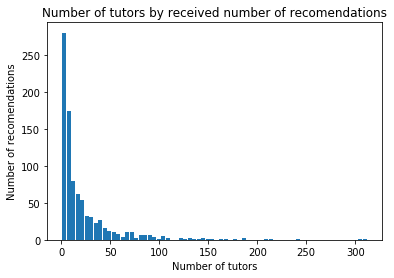

In [12]:
# plot number of tutors by number of tuter they viewed
# in given dataset users commonly watch several tutor
# but there are extreme outliers

dist = result['tutor_id'].value_counts().values

n, bins, patches = plt.hist(x=dist, bins='auto', rwidth=0.9)
plt.xlabel('Number of tutors')
plt.ylabel('Number of recomendations')
plt.title('Number of tutors by received number of recomendations')